# Bank Customer Churn - Exploratory Data Analysis

---

## 📋 EDA Structure Overview

This notebook conducts a comprehensive Exploratory Data Analysis (EDA) on bank customer churn data. The analysis is structured into the following major sections:

### **1. Data Loading & Initial Exploration**
- Load dataset and examine basic statistics
- Check data types and missing values
- Drop irrelevant identifier columns (RowNumber, CustomerId, Surname)

### **2. Demographic Features Analysis**
Analyze how customer demographics relate to churn:
- **Gender**: Distribution and churn rate by gender (innate characteristic)
- **Geography**: Churn patterns across countries (France, Spain, Germany)
- **Age**: Age distribution and segmentation (age groups)

### **3. Customer Engagement & Activity Analysis**
Examine behavioral indicators:
- **IsActiveMember**: Active vs inactive member churn comparison (behavioral)
- **Tenure**: Length of relationship with bank (relationship duration)
- **Tenure Groups**: Binned tenure for simplified modeling
- **Engagement Cross-Analysis**: Activity patterns across demographics

### **4. Product & Service Usage**
Analyze product adoption patterns:
- **NumOfProducts**: Number of bank products held (1, 2, 3, 4)
- **HasCrCard**: Credit card ownership (product ownership indicator)
- **Relationship to tenure**: How product count varies with customer longevity
- **Interaction with demographics**: Product adoption by age, geography, etc.

### **5. Financial Metrics Analysis**
Explore monetary relationships:
- **Balance**: Account balance distribution by churn status
- **EstimatedSalary**: Salary distribution and churn correlation
- **CreditScore**: Credit score patterns among churners vs non-churners
- **Comparative distributions**: KDE plots comparing churned vs retained customers

### **6. Customer Experience Indicators**
Investigate satisfaction and complaints:
- **Satisfaction Score**: Rating distribution (1-5 scale)
- **Complain**: Complaint history and its strong relationship to churn
- **Card Type**: Premium card tiers (SILVER, GOLD, PLATINUM, DIAMOND)
- **Point Earned**: Loyalty/rewards points analysis

### **7. Feature Interactions & Deep Dives**
Explore interesting combinations:
- **Geography × Credit Score**: Regional credit patterns
- **Age × Balance**: Financial standing by age group
- **Active Status × Products**: Engagement and product adoption
- **Complaint × Satisfaction**: Experience quality indicators

### **8. Correlation Analysis**
- Examine relationships between numerical features
- Identify potential redundancies
- Feature importance for modeling

### **9. Data Preparation Function**
- Create preprocessing pipeline based on EDA insights
- Handle encoding for categorical variables
- Engineer features identified as important
- Prepare data for machine learning models

---

**Key Differences from Original Telco Dataset:**
- This is **bank churn** (not telecom) - different industry dynamics
- Focus on **financial metrics** (balance, credit score, salary) rather than service packages
- **Product count** instead of individual service subscriptions
- **Geography** as a major factor (international banking)
- **Customer satisfaction & complaints** are explicitly tracked
- **Loyalty program** (card type, points earned)

Let's begin the detailed analysis! 👇

In [141]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import custom EDA utility functions
from eda_utils import (
    stacked_plot,
    countplot_enhanced,
    density_plot_enhanced,
    kde_comparison_plot,
    print_churn_summary,
    correlation_heatmap,
    plot_demographic_grid,
    validate_data_consistency
)

# Set style
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 100

print("✓ Libraries and utility functions loaded successfully!")

✓ Libraries and utility functions loaded successfully!


---

## 📂 Section 1: Data Loading & Initial Exploration

Load the dataset and perform initial data inspection.

In [142]:
# Load the dataset
df = pd.read_csv("data/Customer-Churn-Records.csv")
print(f"Dataset loaded: {df.shape[0]:,} rows × {df.shape[1]} columns\n")
df.head()

Dataset loaded: 10,000 rows × 18 columns



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [143]:
# Dataset shape and basic info
print("Dataset Shape:", df.shape)
print("\nColumn Names and Types:")
print(df.dtypes)

Dataset Shape: (10000, 18)

Column Names and Types:
RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object


In [144]:
# Check for missing values
missing = df.isnull().sum()
print("Missing Values per Column:")
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("✓ No missing values!")

Missing Values per Column:
✓ No missing values!


In [145]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


### Data Cleaning & Preprocessing

We'll drop identifier columns that don't contribute to churn prediction and standardize column names.

In [146]:
# Drop identifier columns
print("Dropping identifier columns: RowNumber, CustomerId, Surname")
df.drop(['RowNumber', 'CustomerId', 'Surname'], inplace=True, axis=1)

# Convert binary columns to boolean
bin_cols = ['HasCrCard', 'IsActiveMember', 'Exited', 'Complain']
df[bin_cols] = df[bin_cols].astype(bool)

print(f"\n✓ Data cleaned. New shape: {df.shape}")

Dropping identifier columns: RowNumber, CustomerId, Surname

✓ Data cleaned. New shape: (10000, 15)


In [147]:
# Standardize column names: lowercase, underscores instead of spaces
df.columns = [c.strip().replace(" ", "_").lower() for c in df.columns]
print("✓ Column names standardized")
print("\nFinal columns:", list(df.columns))

✓ Column names standardized

Final columns: ['creditscore', 'geography', 'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited', 'complain', 'satisfaction_score', 'card_type', 'point_earned']


In [148]:
# Create age groups for analysis
df['age_group'] = pd.cut(
    df['age'],
    bins=[18, 30, 40, 50, 60, 70, 100],
    labels=['18–30', '31–40', '41–50', '51–60', '61–70', '70+']
)

print("✓ Age groups created")
print("\nAge Group Distribution:")
print(df['age_group'].value_counts().sort_index())

✓ Age groups created

Age Group Distribution:
age_group
18–30    1946
31–40    4451
41–50    2320
51–60     797
61–70     331
70+       133
Name: count, dtype: int64


In [149]:
# Basic statistics summary
print("=" * 80)
print("DATASET SUMMARY")
print("=" * 80)
print(df.describe())
print("\n" + "=" * 80)

DATASET SUMMARY
        creditscore           age        tenure        balance  numofproducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

       estimatedsalary  satisfaction_score  point_earned  
count     10000.000000        10000.000000  10000.000000  
mean     100090.239881            3.013800    606.515100  
std       57510.492818            1.405919    225.924839  
min          11.58

In [150]:
# Check target variable distribution
print("Target Variable (Exited) Distribution:")
print(df['exited'].value_counts())
print(f"\nChurn Rate: {df['exited'].sum() / len(df) * 100:.2f}%")

Target Variable (Exited) Distribution:
exited
False    7962
True     2038
Name: count, dtype: int64

Churn Rate: 20.38%


---

## 📊 Section 2: Demographic Features Analysis

### Analysis Goals:
In this section, we examine how **innate or relatively stable demographic characteristics** relate to customer churn:

1. **Gender**: Does gender play a role in churn? 
   - Hypothesis: Minimal impact (similar to Telco dataset)
   - Innate characteristic

2. **Geography (Country)**: Are there regional patterns in churn rates?
   - France, Spain, and Germany may have different banking regulations, competition, or customer expectations
   - Major difference from Telco dataset (no geographic segmentation)
   - Relatively stable characteristic

3. **Age Distribution and Segmentation**: 
   - Create age groups for better visualization and modeling
   - Younger customers may have different needs than older customers
   - Hypothesis: Older customers more stable/loyal
   - Innate characteristic (changes slowly)

**Note:** This section focuses on demographics ONLY. Product ownership (HasCrCard) and behavioral features (IsActiveMember) are analyzed in later sections.

**Expected Insights:**
- Geography likely to be significant (unlike gender in Telco)
- Age may show strong patterns (older = more loyal)
- Combined demographic effects

---

### Demographic Overview Grid

Create a 3-feature visualization showing churn rates across pure demographic features.

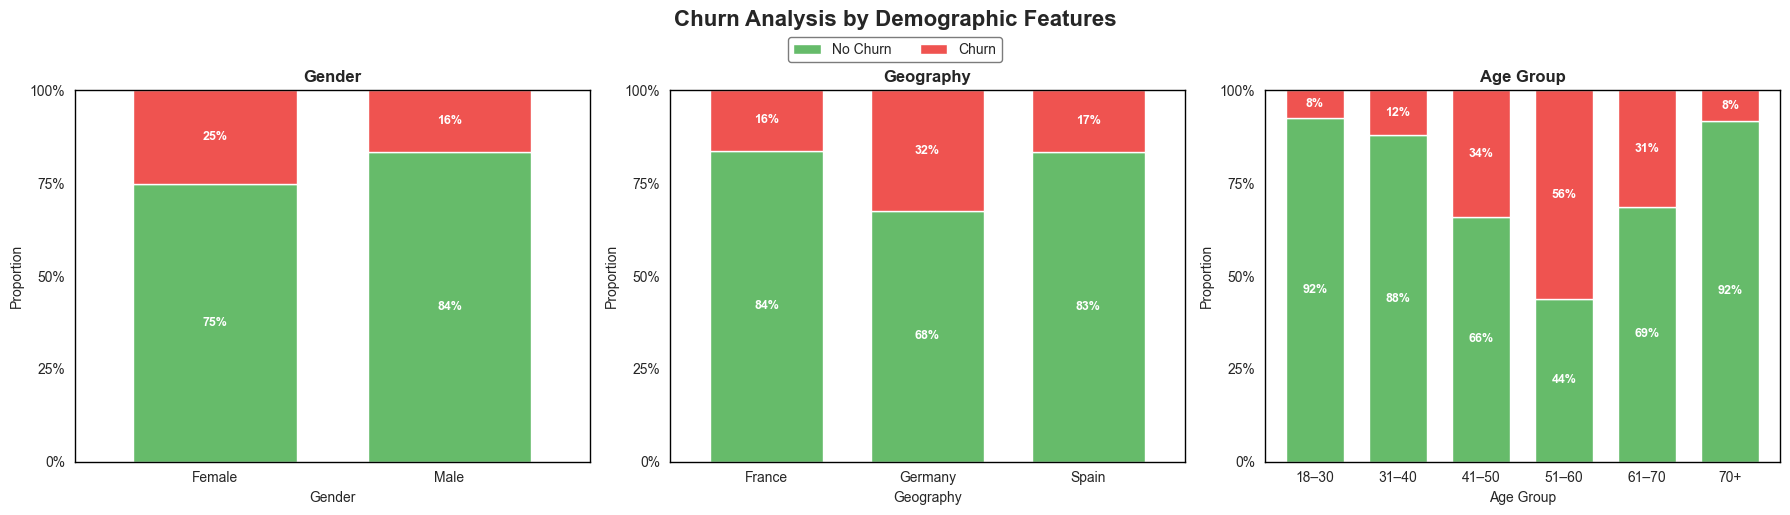

In [151]:
# Create individual demographic visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Churn Analysis by Demographic Features', fontsize=16, fontweight='bold', y=1.02)

# Gender
stacked_plot(df, 'gender', 'exited', ax=axes[0], title='Gender')

# Geography
stacked_plot(df, 'geography', 'exited', ax=axes[1], title='Geography', show_legend=True)

# Age Group
stacked_plot(df, 'age_group', 'exited', ax=axes[2], title='Age Group')

plt.tight_layout()
plt.show()

### Detailed Demographic Analysis

In [152]:
# Gender analysis
print_churn_summary(df, 'gender', 'exited')

CHURN ANALYSIS: Gender

Gender                       Total  Churned  Retained   Churn Rate
------------------------------------------------------------------------------------------
Female                        4543     1139      3404       25.07%
Male                          5457      899      4558       16.47%
------------------------------------------------------------------------------------------

📊 KEY INSIGHTS:
------------------------------------------------------------------------------------------
✓ LOWEST Churn:  Male (16.47%)
✗ HIGHEST Churn: Female (25.07%)

  → Relative risk: 1.5× higher churn in Female vs Male



/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:505: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churned = int(vc.get(True, vc.get(1, 0)))
/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:506: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retained = int(vc.get(False, vc.get(0, 0)))


In [153]:
# Geography analysis
print_churn_summary(df, 'geography', 'exited')

CHURN ANALYSIS: Geography

Geography                    Total  Churned  Retained   Churn Rate
------------------------------------------------------------------------------------------
France                        5014      811      4203       16.17%
Germany                       2509      814      1695       32.44%
Spain                         2477      413      2064       16.67%
------------------------------------------------------------------------------------------

📊 KEY INSIGHTS:
------------------------------------------------------------------------------------------
✓ LOWEST Churn:  France (16.17%)
✗ HIGHEST Churn: Germany (32.44%)

  → Relative risk: 2.0× higher churn in Germany vs France



In [154]:
# Age group analysis
print_churn_summary(df, 'age_group', 'exited', segment_label='Age Group')

CHURN ANALYSIS: Age Group

Age Group                    Total  Churned  Retained   Churn Rate
------------------------------------------------------------------------------------------
18–30                         1946      146      1800        7.50%
31–40                         4451      539      3912       12.11%
41–50                         2320      788      1532       33.97%
51–60                          797      448       349       56.21%
61–70                          331      104       227       31.42%
70+                            133       11       122        8.27%
nan                              0        0         0        0.00%
------------------------------------------------------------------------------------------

📊 KEY INSIGHTS:
------------------------------------------------------------------------------------------
✓ LOWEST Churn:  nan (0.00%)
✗ HIGHEST Churn: 51–60 (56.21%)



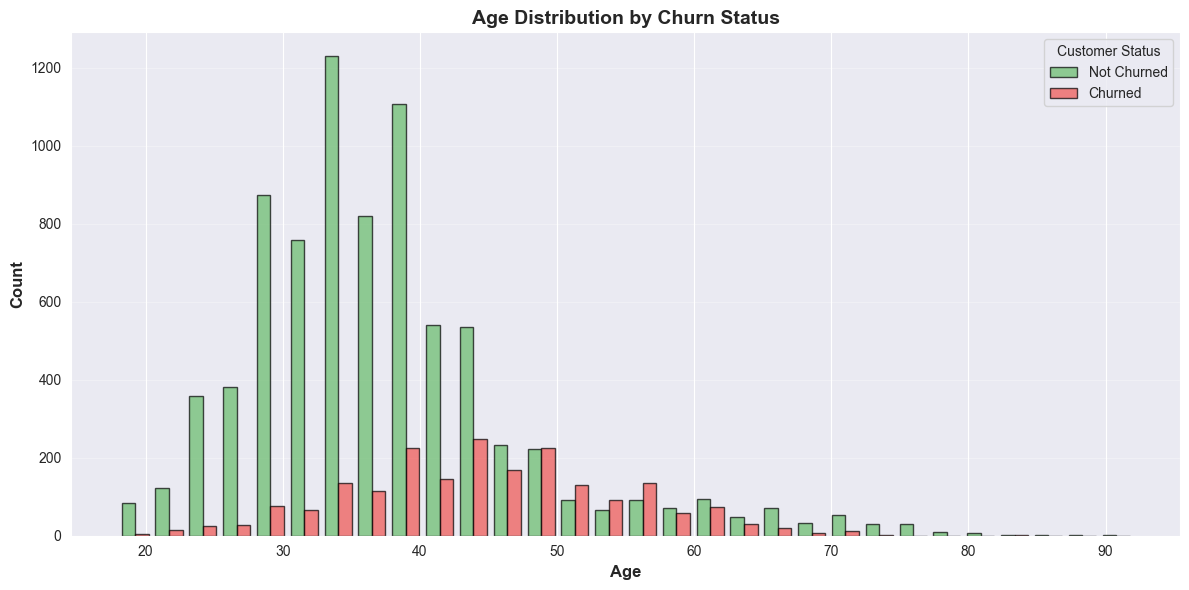

In [155]:
# Age distribution by churn status
fig, ax = plt.subplots(figsize=(12, 6))
churned_temp = df[df['exited'] == True]
not_churned_temp = df[df['exited'] == False]

ax.hist([not_churned_temp['age'], churned_temp['age']], 
        bins=30, label=['Not Churned', 'Churned'],
        color=['#66BB6A', '#EF5350'], alpha=0.7, edgecolor='black')
ax.set_xlabel('Age', fontsize=12, fontweight='semibold')
ax.set_ylabel('Count', fontsize=12, fontweight='semibold')
ax.set_title('Age Distribution by Churn Status', fontsize=14, fontweight='bold')
ax.legend(title='Customer Status', fontsize=10)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Insights from Demographic Analysis:**

**Gender:** Modest effect (25% female vs 16% male churn = 1.5× difference). Weakest demographic predictor.

**Geography:** Strong effect - **Germany at 32% churn is 2× higher than France/Spain** (~16%). Major market issue requiring investigation.

**Age:** Strongest demographic predictor with clear lifecycle pattern:
- Young (18-30): 7.5% churn - highly loyal
- Mid-career (31-40): 12% churn - stable
- **Mid-life (41-50): 34% churn - elevated risk**
- **Pre-retirement (51-60): 56% churn - CRITICAL** (more than half churn, likely moving assets for retirement planning)
- Senior (61-70): 31% churn - still elevated
- Elderly (70+): 8% churn - return to loyalty

**Key Takeaway:** Age (especially 51-60) and Geography (Germany) are the actionable demographic predictors. Focus retention efforts on German customers and those aged 40-65.

---

## 🎯 Section 3: Customer Engagement & Activity Analysis

### Analysis Goals:
This section focuses on **behavioral indicators** that show how engaged customers are with the bank:

1. **IsActiveMember Status**: 
   - Compare active vs inactive members
   - Hypothesis: Active members churn less (very strong indicator)
   - **Behavioral feature** - reflects how customers use their account
   - Similar to "service usage" patterns in Telco dataset

2. **Tenure Distribution**:
   - How long have customers been with the bank?
   - Hypothesis: Longer tenure = lower churn (loyalty builds over time)
   - **Relationship duration** - not innate, but builds over time
   - Direct parallel to Telco analysis

3. **Tenure Grouping**:
   - Create tenure groups for simplified modeling
   - Reduces complexity
   - Makes patterns easier to visualize

4. **Engagement Cross-Analysis**:
   - Activity patterns across age groups
   - Activity patterns across geography

**Key Questions:**
- What percentage of inactive members churn?
- Is there a "critical period" for new customers?
- Do tenure patterns differ by age or geography?
- Are younger customers less active?

---

### IsActiveMember Analysis

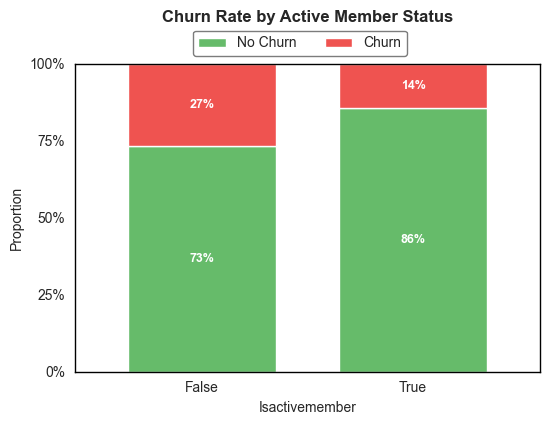

CHURN ANALYSIS: Active Member Status

Active Member Status         Total  Churned  Retained   Churn Rate
------------------------------------------------------------------------------------------
False                         4849     1303      3546       26.87%
True                          5151      735      4416       14.27%
------------------------------------------------------------------------------------------

📊 KEY INSIGHTS:
------------------------------------------------------------------------------------------
✓ LOWEST Churn:  True (14.27%)
✗ HIGHEST Churn: False (26.87%)

  → Relative risk: 1.9× higher churn in False vs True



/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:505: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churned = int(vc.get(True, vc.get(1, 0)))
/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:506: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retained = int(vc.get(False, vc.get(0, 0)))


In [187]:
# Active member churn analysis
stacked_plot(df, 'isactivemember', 'exited', 
             title='Churn Rate by Active Member Status', 
             show_legend=True)
plt.show()

print_churn_summary(df, 'isactivemember', 'exited', segment_label='Active Member Status')

### Tenure Analysis

In [157]:
# Tenure distribution statistics
print("Tenure Statistics:")
print(df['tenure'].describe())
print("\nMost Common Tenure Values:")
print(df['tenure'].value_counts().head(10))

Tenure Statistics:
count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: tenure, dtype: float64

Most Common Tenure Values:
tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
Name: count, dtype: int64


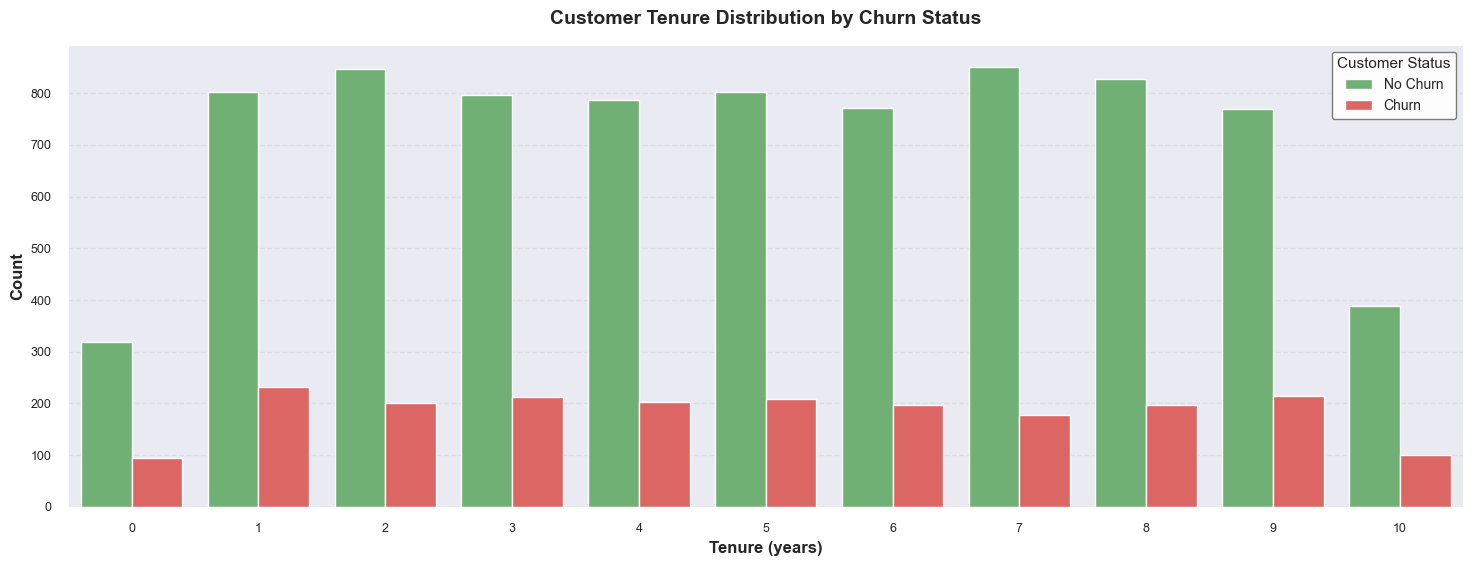

In [158]:
# Tenure distribution by churn status
countplot_enhanced(df, x='tenure', hue='exited',
                   title='Customer Tenure Distribution by Churn Status',
                   xlabel='Tenure (years)')
plt.show()

In [159]:
# Create tenure groups
def categorize_tenure(t):
    if t <= 2:
        return '0-2 years'
    elif t <= 4:
        return '3-4 years'
    elif t <= 6:
        return '5-6 years'
    elif t <= 8:
        return '7-8 years'
    else:
        return '9+ years'

df['tenure_group'] = df['tenure'].apply(categorize_tenure)

print("✓ Tenure groups created")
print("\nTenure Group Distribution:")
print(df['tenure_group'].value_counts())

✓ Tenure groups created

Tenure Group Distribution:
tenure_group
0-2 years    2496
7-8 years    2053
3-4 years    1998
5-6 years    1979
9+ years     1474
Name: count, dtype: int64


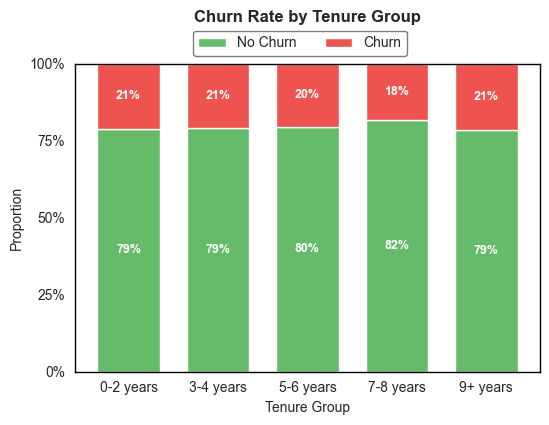

CHURN ANALYSIS: Tenure Group

Tenure Group                 Total  Churned  Retained   Churn Rate
------------------------------------------------------------------------------------------
0-2 years                     2496      528      1968       21.15%
3-4 years                     1998      416      1582       20.82%
5-6 years                     1979      405      1574       20.46%
7-8 years                     2053      374      1679       18.22%
9+ years                      1474      315      1159       21.37%
------------------------------------------------------------------------------------------

📊 KEY INSIGHTS:
------------------------------------------------------------------------------------------
✓ LOWEST Churn:  7-8 years (18.22%)
✗ HIGHEST Churn: 9+ years (21.37%)

  → Relative risk: 1.2× higher churn in 9+ years vs 7-8 years



/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:505: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churned = int(vc.get(True, vc.get(1, 0)))
/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:506: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retained = int(vc.get(False, vc.get(0, 0)))


In [160]:
# Tenure group churn analysis
stacked_plot(df, 'tenure_group', 'exited',
             title='Churn Rate by Tenure Group',
             show_legend=True)
plt.show()

print_churn_summary(df, 'tenure_group', 'exited', segment_label='Tenure Group')

### Engagement Cross-Analysis

In [161]:
# Activity rate by age group
activity_by_age = df.groupby('age_group')['isactivemember'].agg(['sum', 'count'])
activity_by_age['active_rate'] = (activity_by_age['sum'] / activity_by_age['count'] * 100)
print("=" * 70)
print("ACTIVITY RATE BY AGE GROUP")
print("=" * 70)
print(activity_by_age[['active_rate']])
print("=" * 70)

ACTIVITY RATE BY AGE GROUP
           active_rate
age_group             
18–30        51.027749
31–40        49.764098
41–50        47.155172
51–60        57.841907
61–70        76.737160
70+          90.977444


/var/folders/w6/pmp1shhs1zq9k_q9tnxbc8ch0000gn/T/ipykernel_48679/93514908.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_by_age = df.groupby('age_group')['isactivemember'].agg(['sum', 'count'])


In [162]:
# Activity rate by geography
activity_by_geo = df.groupby('geography')['isactivemember'].agg(['sum', 'count'])
activity_by_geo['active_rate'] = (activity_by_geo['sum'] / activity_by_geo['count'] * 100)
print("=" * 70)
print("ACTIVITY RATE BY GEOGRAPHY")
print("=" * 70)
print(activity_by_geo[['active_rate']])
print("=" * 70)

ACTIVITY RATE BY GEOGRAPHY
           active_rate
geography             
France       51.675309
Germany      49.740933
Spain        52.967299


**Insights from Engagement Analysis:**

**IsActiveMember:** Very strong predictor - **inactive members have 27% churn vs 14% for active** (1.9× difference). Nearly half of churn is driven by inactivity.

**Tenure:** Surprisingly weak predictor - churn rates are flat across all tenure groups (18-21%), with only 1.2× difference between best and worst. Tenure does NOT indicate loyalty in this dataset.

**Activity Patterns (Cross-Analysis):**
- Activity rate INCREASES with age: Young adults ~50% active, seniors 70-90% active (counterintuitive - older customers more engaged!)
- Geography has minimal effect on activity (~50-53% across France/Spain/Germany)

**Key Takeaway:** IsActiveMember is a critical behavioral predictor (1.9× effect), but tenure provides little value. The finding that older customers are MORE active helps explain why they're less likely to churn (until the 51-60 retirement planning phase).

---

---

## 🏦 Section 4: Product & Service Usage Analysis

### Analysis Goals:
Unlike Telco's multiple individual services, bank customers have consolidated product metrics. This section explores:

1. **NumOfProducts**: Number of bank products held (1-4)
   - How many products does each customer have?
   - Do customers with more products churn less?

2. **HasCrCard**: Credit card ownership
   - **Product ownership indicator** (not demographic)
   - Do credit card holders churn less?
   - Indicates product diversification

3. **Product Adoption Patterns**:
   - By tenure: Do longer-tenured customers have more products?
   - By demographics: Age and geographic differences
   - By activity status: Do active members have more products?

**Hypothesis:**
- Customers with 2-3 products likely have optimal engagement (not too few, not overwhelmed)
- Single-product customers at higher churn risk
- Credit card holders more invested in bank relationship

---

### Number of Products Distribution

Number of Products Distribution:
numofproducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64


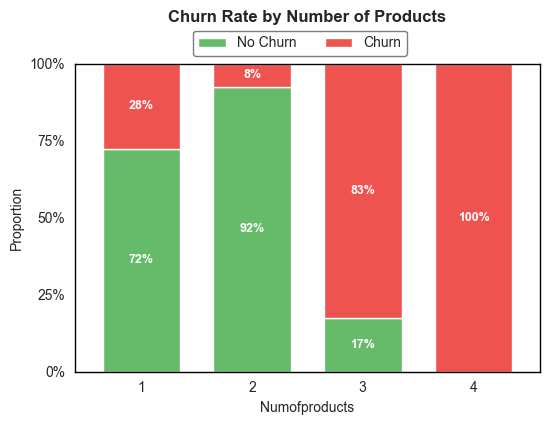

CHURN ANALYSIS: Number of Products

Number of Products           Total  Churned  Retained   Churn Rate
------------------------------------------------------------------------------------------
1                             5084     1409      3675       27.71%
2                             4590      349      4241        7.60%
3                              266      220        46       82.71%
4                               60       60        60      100.00%
------------------------------------------------------------------------------------------

📊 KEY INSIGHTS:
------------------------------------------------------------------------------------------
✓ LOWEST Churn:  2 (7.60%)
✗ HIGHEST Churn: 4 (100.00%)

  → Relative risk: 13.2× higher churn in 4 vs 2



/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:505: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churned = int(vc.get(True, vc.get(1, 0)))
/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:506: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retained = int(vc.get(False, vc.get(0, 0)))


In [163]:
# Product count distribution
print("Number of Products Distribution:")
print(df['numofproducts'].value_counts().sort_index())

# Churn rate by product count
stacked_plot(df, 'numofproducts', 'exited',
             title='Churn Rate by Number of Products',
             show_legend=True)
plt.show()

print_churn_summary(df, 'numofproducts', 'exited', segment_label='Number of Products')

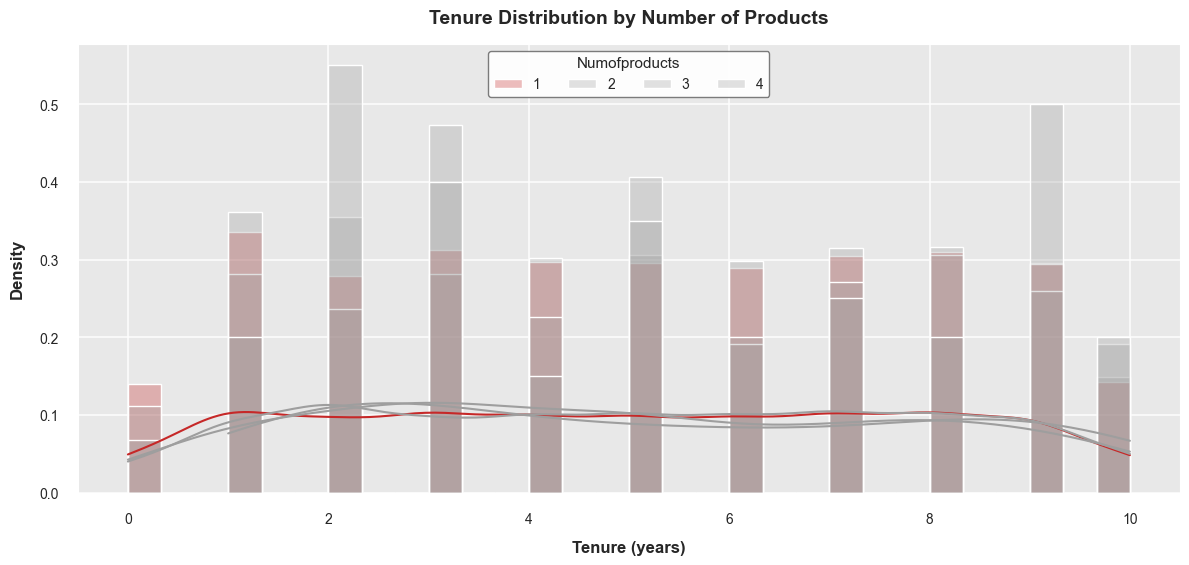

In [164]:
# Product count by tenure
density_plot_enhanced(df, x_col='tenure', group_col='numofproducts',
                      title='Tenure Distribution by Number of Products')
plt.show()

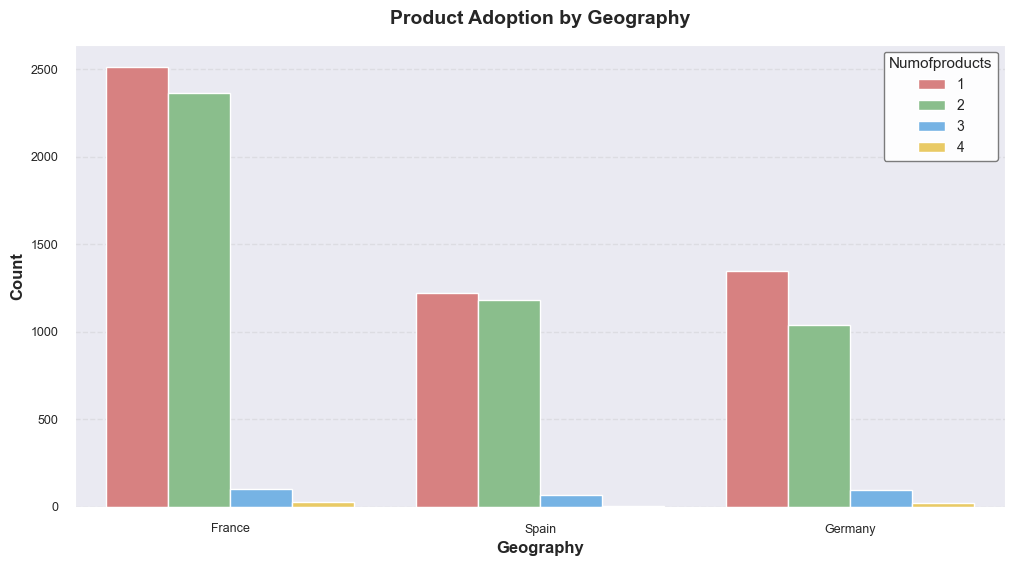

In [165]:
# Product count by geography
countplot_enhanced(df, x='geography', hue='numofproducts',
                   title='Product Adoption by Geography',
                   figsize=(12, 6),
                   palette={1: "#E57373", 2: "#81C784", 3: "#64B5F6", 4: "#FFD54F"})
plt.show()

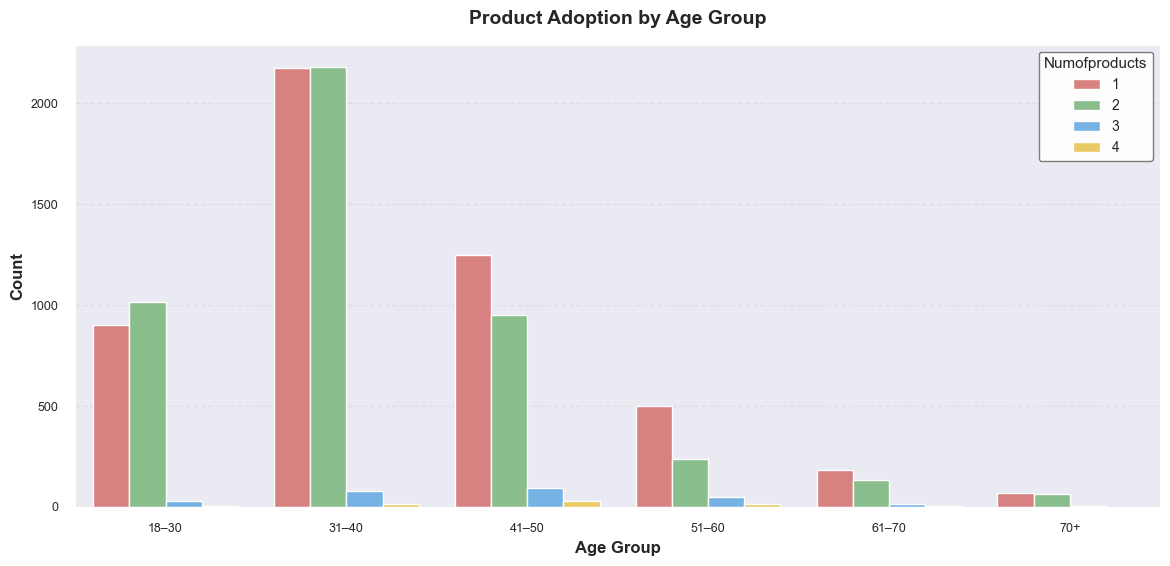

In [166]:
# Product count by age group
countplot_enhanced(df, x='age_group', hue='numofproducts',
                   title='Product Adoption by Age Group',
                   figsize=(14, 6),
                   palette={1: "#E57373", 2: "#81C784", 3: "#64B5F6", 4: "#FFD54F"})
plt.show()

### Credit Card Ownership (HasCrCard)

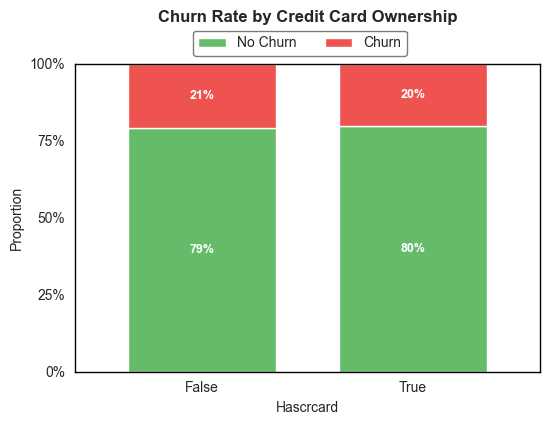

CHURN ANALYSIS: Credit Card Ownership

Credit Card Ownership        Total  Churned  Retained   Churn Rate
------------------------------------------------------------------------------------------
False                         2945      613      2332       20.81%
True                          7055     1425      5630       20.20%
------------------------------------------------------------------------------------------

📊 KEY INSIGHTS:
------------------------------------------------------------------------------------------
✓ LOWEST Churn:  True (20.20%)
✗ HIGHEST Churn: False (20.81%)

  → Relative risk: 1.0× higher churn in False vs True



/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:505: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churned = int(vc.get(True, vc.get(1, 0)))
/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:506: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retained = int(vc.get(False, vc.get(0, 0)))


In [167]:
# Credit card ownership analysis
stacked_plot(df, 'hascrcard', 'exited', 
             title='Churn Rate by Credit Card Ownership', 
             show_legend=True)
plt.show()

print_churn_summary(df, 'hascrcard', 'exited', segment_label='Credit Card Ownership')

In [168]:
# Credit card ownership by number of products
crosstab_card_products = pd.crosstab(df['numofproducts'], df['hascrcard'], normalize='index') * 100
print("=" * 70)
print("CREDIT CARD OWNERSHIP BY NUMBER OF PRODUCTS (%)")
print("=" * 70)
print(crosstab_card_products)
print("=" * 70)

CREDIT CARD OWNERSHIP BY NUMBER OF PRODUCTS (%)
hascrcard          False      True 
numofproducts                      
1              29.622345  70.377655
2              29.281046  70.718954
3              28.571429  71.428571
4              31.666667  68.333333


**Insights from Product Usage Analysis:**

**Number of Products:** EXTREMELY strong predictor with clear "Goldilocks zone":
- 1 product: 28% churn (under-engaged)
- **2 products: 7.6% churn - OPTIMAL!** (lowest churn, 46% of customers)
- 3 products: 83% churn - DISASTER ZONE! (likely over-serviced/forced cross-sell)
- 4 products: 100% churn - ALL customers leave (60 customers, all churned)

**HasCrCard:** Essentially no effect (20.8% vs 20.2% churn = 1.0× difference). Not useful for prediction. ~70% have credit cards regardless of product count.

**Product Adoption Patterns:** Most customers have 1-2 products across all demographics. No strong variation by geography, age, or tenure.

**Key Takeaway:** Having exactly 2 products is the sweet spot (7.6% churn). **Critical issue: Customers with 3-4 products have catastrophic churn (83-100%)** - suggests aggressive cross-selling backfires. Review product bundling strategy immediately.

---

**Insights from Financial Metrics Analysis:**

**Balance:** Strong bimodal pattern with **36% at $0 balance** vs ~64% at $100-150k. Churned customers show two peaks: one at $0 and another at ~$125k (mid-high balance). See Section 7 for churn rate analysis.

**EstimatedSalary:** No predictive value - distributions for churned vs not churned are nearly identical (uniform ~$0-$200k). Income level does not affect churn.

**CreditScore:** No predictive value - distributions for churned vs not churned almost perfectly overlap (centered at ~650). Credit worthiness is irrelevant to churn.

**Key Takeaway:** Balance shows the only notable distributional difference among financial metrics (bimodal pattern), though salary and credit score provide no information. See zero-balance deep dive in Section 7 for churn implications.

---

## 💰 Section 5: Financial Metrics Analysis

### Analysis Goals:
This section is **unique to bank churn** - no equivalent in Telco dataset. We analyze three key financial indicators:

1. **Account Balance**: Distribution and impact on churn
2. **Estimated Salary**: Income level correlation with churn
3. **Credit Score**: Credit worthiness patterns

**Expected Insights:**
- Zero-balance accounts likely high churn risk
- Salary may have less impact than expected
- Credit score could show bidirectional effect

---

### Account Balance Analysis

In [169]:
# Prepare churned/not_churned groups for KDE plots
churned = df[df['exited'] == True]
not_churned = df[df['exited'] == False]

In [170]:
# Balance statistics
print("Account Balance Statistics:")
print(df['balance'].describe())

# Zero balance analysis
zero_balance = (df['balance'] == 0).sum()
print(f"\nCustomers with $0 balance: {zero_balance:,} ({zero_balance/len(df)*100:.1f}%)")

Account Balance Statistics:
count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: balance, dtype: float64

Customers with $0 balance: 3,617 (36.2%)


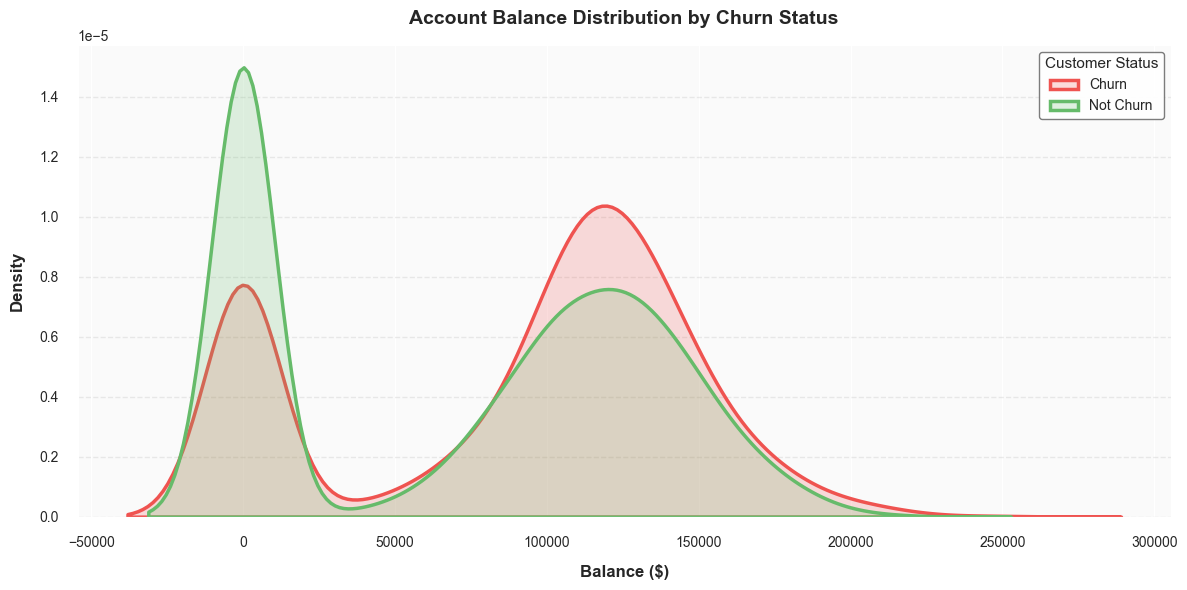

In [171]:
# Balance distribution by churn
kde_comparison_plot(churned, not_churned, 'balance',
                    title='Account Balance Distribution by Churn Status')
plt.show()

### Estimated Salary Analysis

Estimated Salary Statistics:
count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimatedsalary, dtype: float64


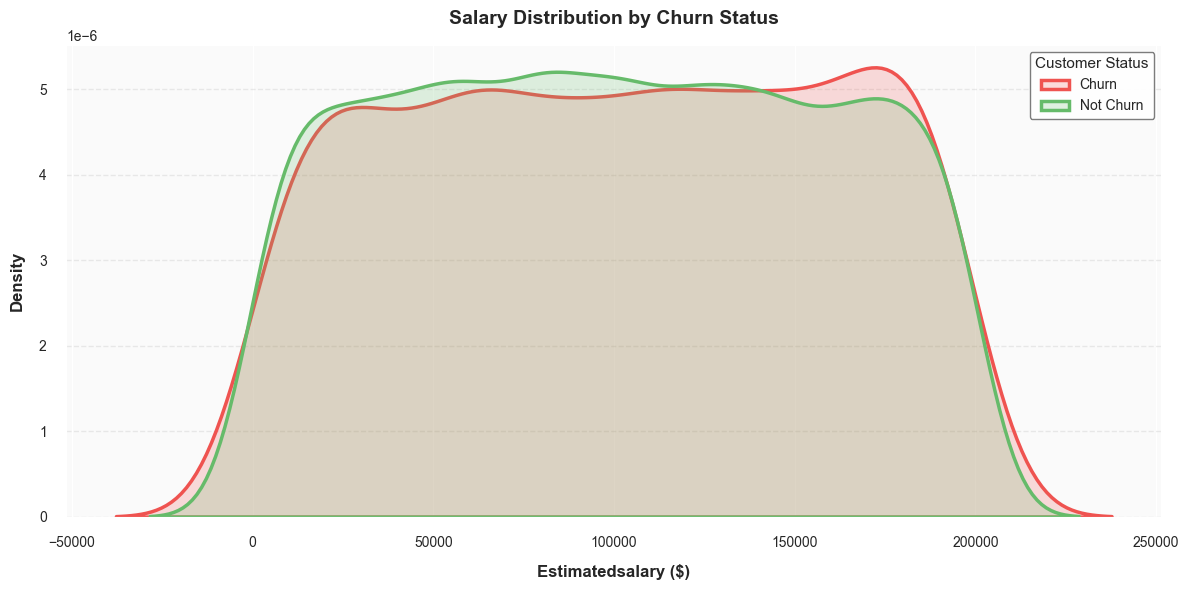

In [172]:
# Salary statistics
print("Estimated Salary Statistics:")
print(df['estimatedsalary'].describe())

# Salary distribution by churn
kde_comparison_plot(churned, not_churned, 'estimatedsalary',
                    title='Salary Distribution by Churn Status')
plt.show()

### Credit Score Analysis

Credit Score Statistics:
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: creditscore, dtype: float64


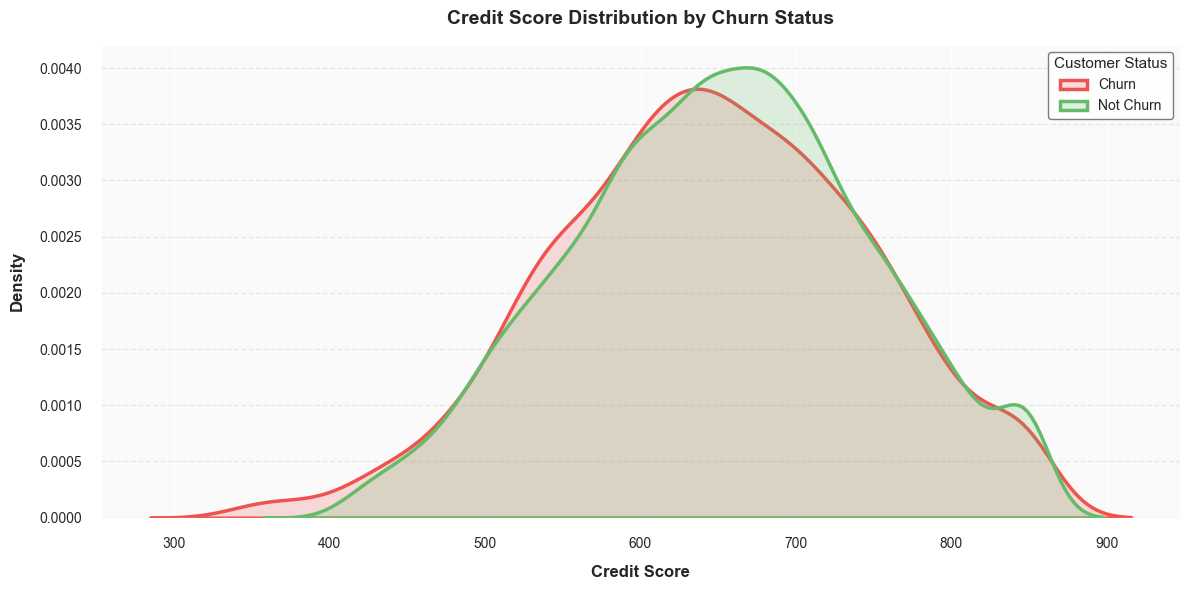

In [173]:
# Credit score statistics
print("Credit Score Statistics:")
print(df['creditscore'].describe())

# Credit score distribution by churn
kde_comparison_plot(churned, not_churned, 'creditscore',
                    title='Credit Score Distribution by Churn Status',
                    xlabel='Credit Score')
plt.show()

**Insights from Customer Experience Analysis:**

**Complain:** THE STRONGEST PREDICTOR IN THE ENTIRE DATASET - **99.5% of complainers churn vs 0.05% of non-complainers** (1979× difference!). Filing a complaint virtually guarantees churn. 20% of customers (2,044) filed complaints.

**Satisfaction Score:** No predictive value - churn rates flat across all scores (19.6% - 21.8%, only 1.1× difference). Surprisingly, satisfaction level doesn't matter.

**Card Type:** No predictive value - all card tiers have similar churn (19-22%, only 1.1× difference). Premium card holders don't stay longer.

**Points Earned:** No predictive value - distributions for churned vs not churned are nearly identical (uniform ~200-1000 points). Rewards program usage is irrelevant.

**Key Takeaway:** Complaint status is BY FAR the most critical predictor discovered - it's a death sentence for retention (99.5% churn). All other experience metrics (satisfaction, card tier, points) are surprisingly useless. Focus: Prevent complaints from happening, and aggressively intervene if one is filed.

---

---

## ⭐ Section 6: Customer Experience Indicators

### Analysis Goals:
These features are **unique to this bank dataset** and provide direct feedback on customer satisfaction:

1. **Satisfaction Score** (1-5 scale): Rating distribution and churn patterns
2. **Complain** (Binary): Complaint history impact
3. **Card Type** (SILVER, GOLD, PLATINUM, DIAMOND): Premium tier analysis
4. **Point Earned** (Loyalty Program): Rewards effectiveness

**Key Questions:**
- Is "Complain" a stronger predictor than "Satisfaction Score"?
- Do loyalty programs actually reduce churn?
- Are there dissatisfied customers who haven't complained yet?

---

### Satisfaction Score Analysis

Satisfaction Score Distribution:
satisfaction_score
1    1932
2    2014
3    2042
4    2008
5    2004
Name: count, dtype: int64


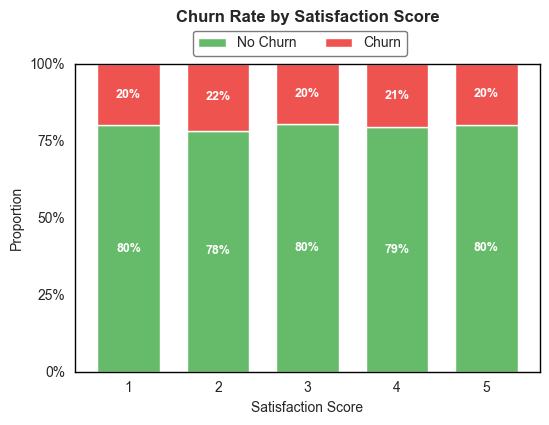

CHURN ANALYSIS: Satisfaction Score

Satisfaction Score           Total  Churned  Retained   Churn Rate
------------------------------------------------------------------------------------------
1                             1932      387      1545       20.03%
2                             2014      439      1575       21.80%
3                             2042      401      1641       19.64%
4                             2008      414      1594       20.62%
5                             2004      397      1607       19.81%
------------------------------------------------------------------------------------------

📊 KEY INSIGHTS:
------------------------------------------------------------------------------------------
✓ LOWEST Churn:  3 (19.64%)
✗ HIGHEST Churn: 2 (21.80%)

  → Relative risk: 1.1× higher churn in 2 vs 3



/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:505: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churned = int(vc.get(True, vc.get(1, 0)))
/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:506: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retained = int(vc.get(False, vc.get(0, 0)))


In [174]:
# Satisfaction score distribution
print("Satisfaction Score Distribution:")
print(df['satisfaction_score'].value_counts().sort_index())

# Churn by satisfaction
stacked_plot(df, 'satisfaction_score', 'exited',
             title='Churn Rate by Satisfaction Score',
             show_legend=True)
plt.show()

print_churn_summary(df, 'satisfaction_score', 'exited', segment_label='Satisfaction Score')

### Complain Analysis

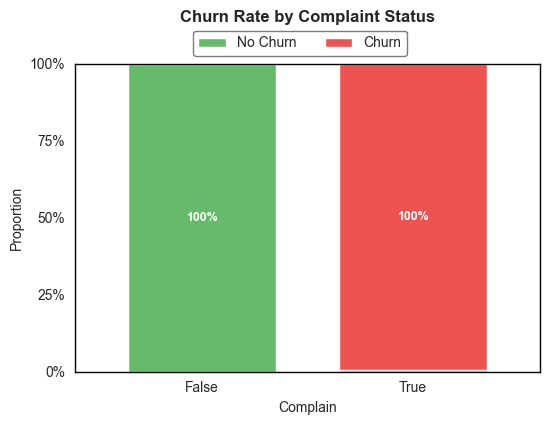

CHURN ANALYSIS: Complaint Filed

Complaint Filed              Total  Churned  Retained   Churn Rate
------------------------------------------------------------------------------------------
False                         7956        4      7952        0.05%
True                          2044     2034        10       99.51%
------------------------------------------------------------------------------------------

📊 KEY INSIGHTS:
------------------------------------------------------------------------------------------
✓ LOWEST Churn:  False (0.05%)
✗ HIGHEST Churn: True (99.51%)

  → Relative risk: 1979.3× higher churn in True vs False



/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:505: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churned = int(vc.get(True, vc.get(1, 0)))
/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:506: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retained = int(vc.get(False, vc.get(0, 0)))


In [175]:
# Complaint analysis
stacked_plot(df, 'complain', 'exited',
             title='Churn Rate by Complaint Status',
             show_legend=True)
plt.show()

print_churn_summary(df, 'complain', 'exited', segment_label='Complaint Filed')

In [176]:
# Cross-analysis: Complain × Satisfaction
print("=" * 80)
print("COMPLAINT VS SATISFACTION CROSS-ANALYSIS")
print("=" * 80)
crosstab = pd.crosstab(df['complain'], df['satisfaction_score'], margins=True)
print(crosstab)
print("=" * 80)

COMPLAINT VS SATISFACTION CROSS-ANALYSIS
satisfaction_score     1     2     3     4     5    All
complain                                               
False               1545  1576  1636  1595  1604   7956
True                 387   438   406   413   400   2044
All                 1932  2014  2042  2008  2004  10000


### Card Type Analysis

Card Type Distribution:
card_type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


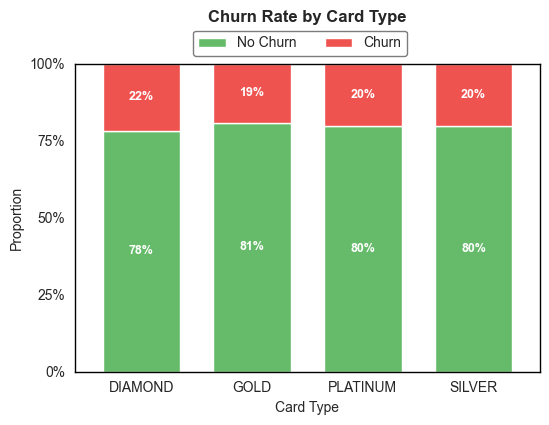

CHURN ANALYSIS: Card Type

Card Type                    Total  Churned  Retained   Churn Rate
------------------------------------------------------------------------------------------
DIAMOND                       2507      546      1961       21.78%
GOLD                          2502      482      2020       19.26%
PLATINUM                      2495      508      1987       20.36%
SILVER                        2496      502      1994       20.11%
------------------------------------------------------------------------------------------

📊 KEY INSIGHTS:
------------------------------------------------------------------------------------------
✓ LOWEST Churn:  GOLD (19.26%)
✗ HIGHEST Churn: DIAMOND (21.78%)

  → Relative risk: 1.1× higher churn in DIAMOND vs GOLD



/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:505: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churned = int(vc.get(True, vc.get(1, 0)))
/Users/andrewsullivan/Desktop/new_data_science_project/bank_churn_project/eda_utils.py:506: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  retained = int(vc.get(False, vc.get(0, 0)))


In [177]:
# Card type distribution
print("Card Type Distribution:")
print(df['card_type'].value_counts())

# Churn by card type
stacked_plot(df, 'card_type', 'exited',
             title='Churn Rate by Card Type',
             show_legend=True)
plt.show()

print_churn_summary(df, 'card_type', 'exited', segment_label='Card Type')

### Points Earned (Loyalty Program) Analysis

Points Earned Statistics:
count    10000.000000
mean       606.515100
std        225.924839
min        119.000000
25%        410.000000
50%        605.000000
75%        801.000000
max       1000.000000
Name: point_earned, dtype: float64


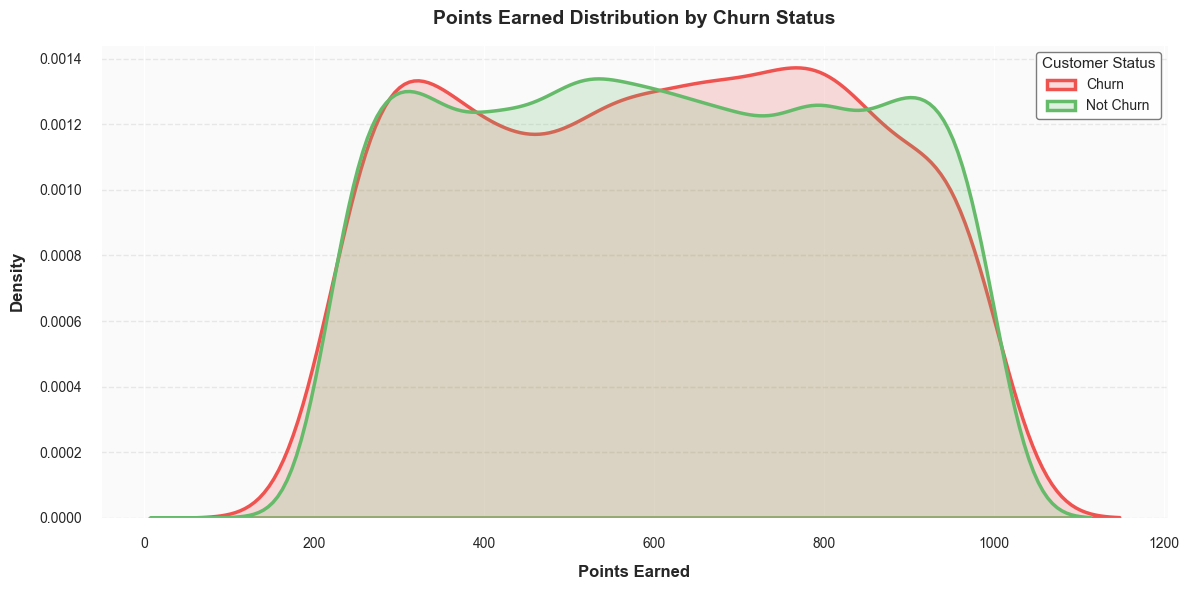

In [178]:
# Points statistics
print("Points Earned Statistics:")
print(df['point_earned'].describe())

# Points distribution by churn
kde_comparison_plot(churned, not_churned, 'point_earned',
                    title='Points Earned Distribution by Churn Status',
                    xlabel='Points Earned')
plt.show()

---

## 🔄 Section 7: Feature Interactions & Deep Dives

Explore interesting combinations of features that may reveal hidden patterns.

### Geography × Credit Score

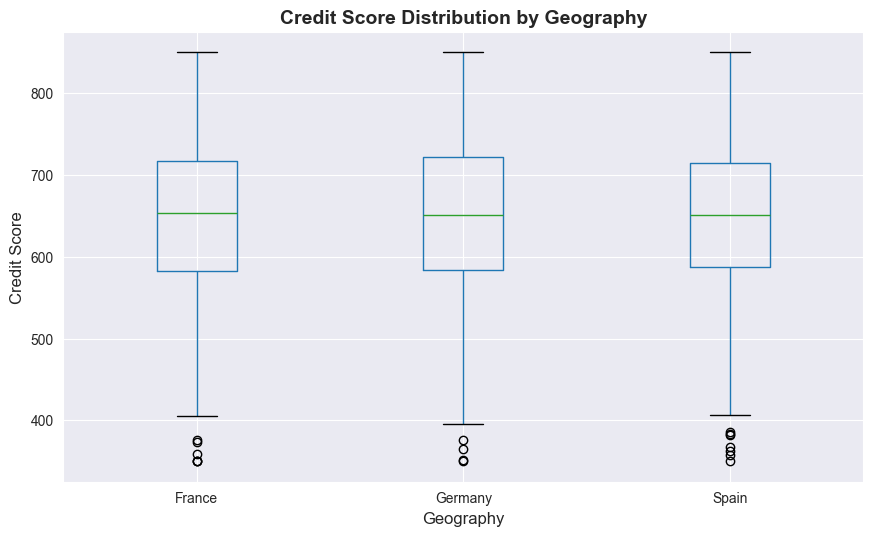

In [179]:
# Credit score by geography
fig, ax = plt.subplots(figsize=(10, 6))
df.boxplot(column='creditscore', by='geography', ax=ax)
ax.set_title('Credit Score Distribution by Geography', fontsize=14, fontweight='bold')
ax.set_xlabel('Geography', fontsize=12)
ax.set_ylabel('Credit Score', fontsize=12)
plt.suptitle('')  # Remove default title
plt.show()

### Age × Balance

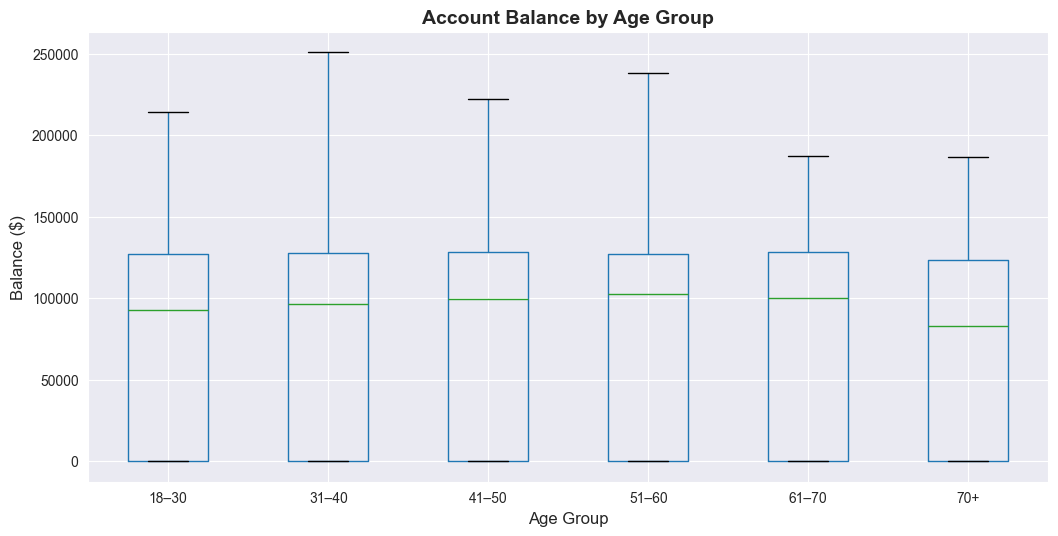

In [180]:
# Balance by age group
fig, ax = plt.subplots(figsize=(12, 6))
df.boxplot(column='balance', by='age_group', ax=ax)
ax.set_title('Account Balance by Age Group', fontsize=14, fontweight='bold')
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Balance ($)', fontsize=12)
plt.suptitle('')
plt.show()

### Active Member × Products

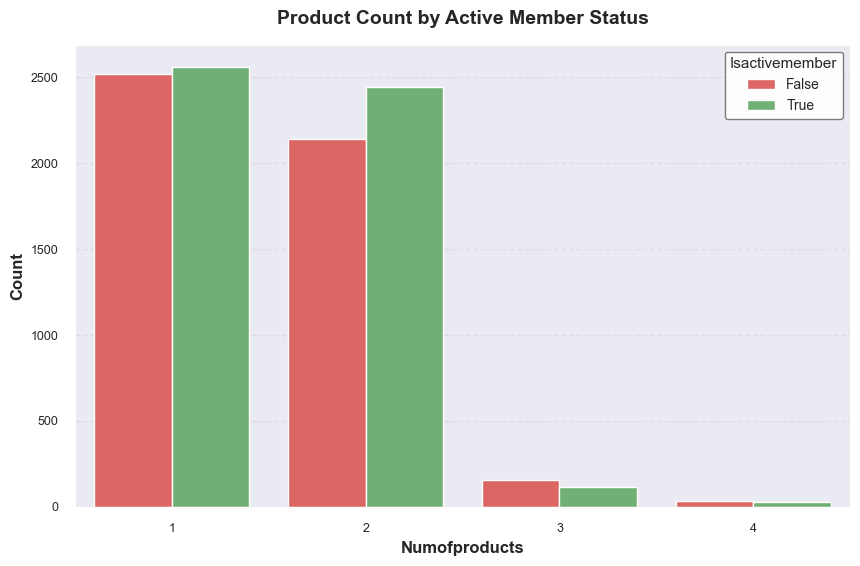

In [181]:
# Product count by active status
countplot_enhanced(df, x='numofproducts', hue='isactivemember',
                   title='Product Count by Active Member Status',
                   figsize=(10, 6),
                   palette={False: "#EF5350", True: "#66BB6A"})
plt.show()

### Zero Balance Deep Dive

In [182]:
# Zero balance analysis
zero_bal_df = df[df['balance'] == 0].copy()
non_zero_bal_df = df[df['balance'] > 0].copy()

print("=" * 80)
print("ZERO BALANCE CUSTOMER ANALYSIS")
print("=" * 80)
print(f"\nZero Balance Customers: {len(zero_bal_df):,} ({len(zero_bal_df)/len(df)*100:.1f}%)")
print(f"Non-Zero Balance Customers: {len(non_zero_bal_df):,} ({len(non_zero_bal_df)/len(df)*100:.1f}%)")

zero_churn = zero_bal_df['exited'].sum()
zero_churn_rate = (zero_churn / len(zero_bal_df) * 100) if len(zero_bal_df) > 0 else 0

non_zero_churn = non_zero_bal_df['exited'].sum()
non_zero_churn_rate = (non_zero_churn / len(non_zero_bal_df) * 100) if len(non_zero_bal_df) > 0 else 0

print(f"\nZero Balance Churn Rate: {zero_churn_rate:.2f}%")
print(f"Non-Zero Balance Churn Rate: {non_zero_churn_rate:.2f}%")

# Check if zero balance customers are inactive
zero_inactive_pct = (~zero_bal_df['isactivemember']).mean() * 100
print(f"\nZero Balance customers who are INACTIVE: {zero_inactive_pct:.1f}%")
print("=" * 80)

ZERO BALANCE CUSTOMER ANALYSIS

Zero Balance Customers: 3,617 (36.2%)
Non-Zero Balance Customers: 6,383 (63.8%)

Zero Balance Churn Rate: 13.82%
Non-Zero Balance Churn Rate: 24.10%

Zero Balance customers who are INACTIVE: 48.2%


**Insights from Feature Interactions Analysis:**

**Geography × Credit Score:** No interaction - credit scores uniformly distributed (~650 median) across all countries. Germany's high churn is NOT due to credit quality differences.

**Age × Balance:** No interaction - account balances similar across all age groups (~$100k median). Age-based churn patterns are NOT driven by wealth differences.

**Active Status × Product Count:** Clear pattern - inactive members skew toward 1 product, active members toward 2. This reinforces that 2-product customers are more engaged.

**Zero Balance Deep Dive:** Counterintuitive finding - **zero balance customers actually churn LESS (13.8% vs 24.1%)**. Despite 36% of customers having $0 balance and 48% being inactive, they're more loyal than funded accounts. These may be "parking" accounts customers want to keep open.

**Key Takeaway:** Most interactions show independence - demographic and financial factors operate separately. The zero-balance paradox suggests these aren't abandoned accounts but intentionally maintained low-activity accounts.

---

---

## 📈 Section 8: Correlation Analysis

Examine relationships between numerical features to identify correlations and redundancies.

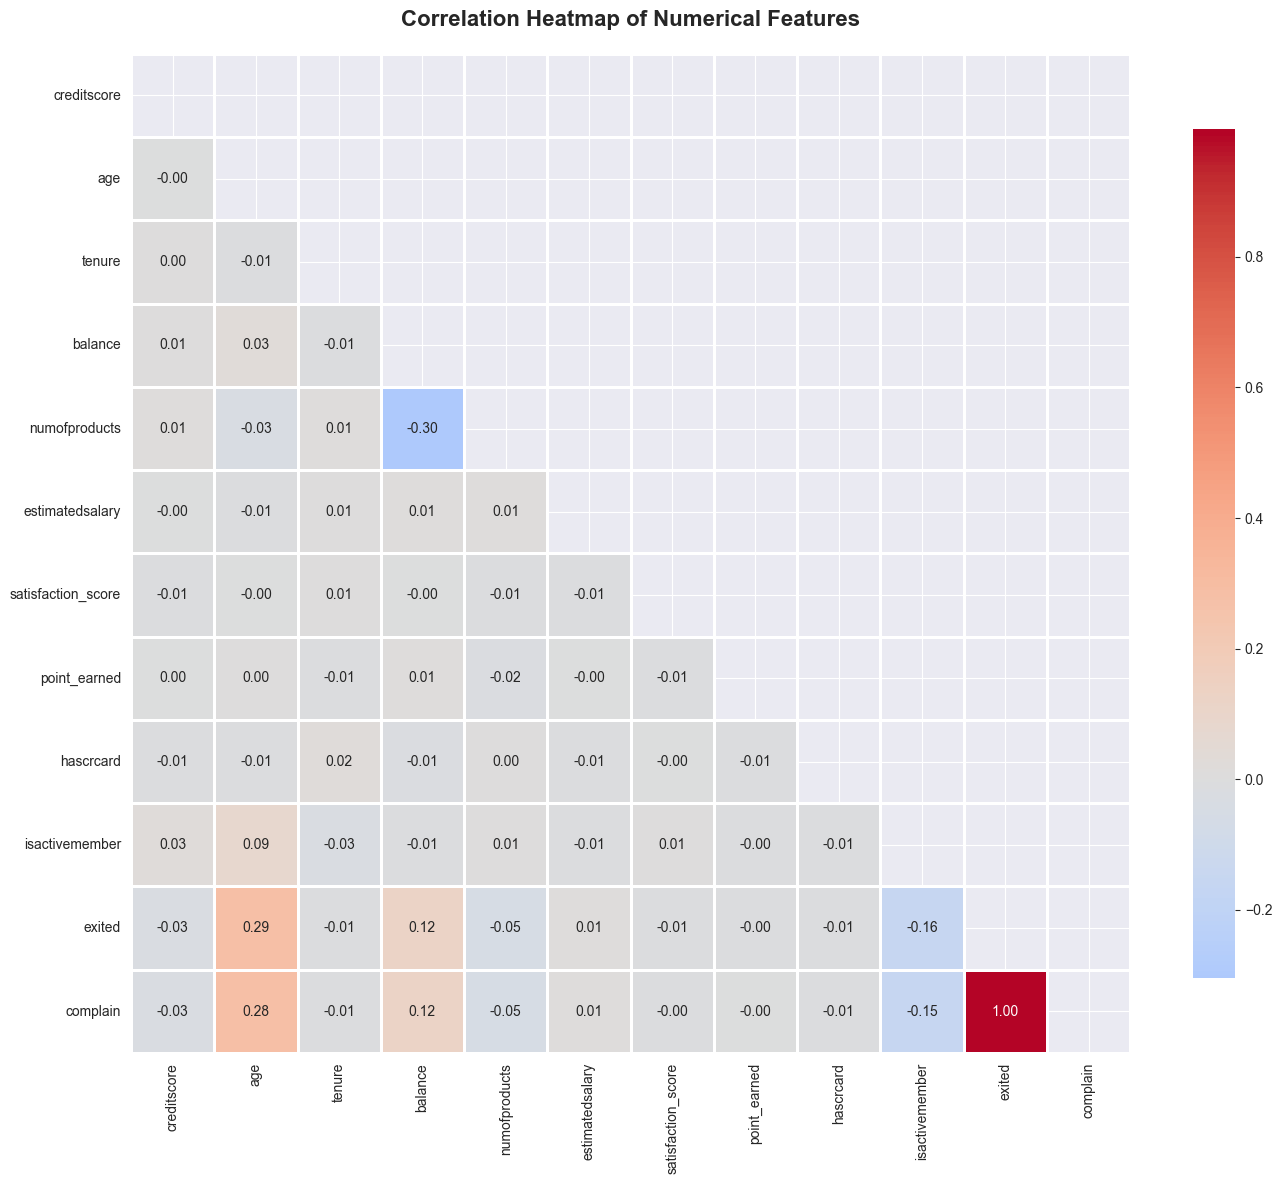

In [183]:
# Select numerical columns for correlation
numerical_cols = [
    'creditscore', 'age', 'tenure', 'balance', 
    'numofproducts', 'estimatedsalary', 
    'satisfaction_score', 'point_earned'
]

# Add boolean columns as int
corr_df = df[numerical_cols].copy()
corr_df['hascrcard'] = df['hascrcard'].astype(int)
corr_df['isactivemember'] = df['isactivemember'].astype(int)
corr_df['exited'] = df['exited'].astype(int)
corr_df['complain'] = df['complain'].astype(int)

# Create correlation heatmap
correlation_heatmap(corr_df, figsize=(14, 12))
plt.show()

In [184]:
# Feature correlation with target (exited)
target_corr = corr_df.corr()['exited'].sort_values(ascending=False)
print("=" * 80)
print("FEATURE CORRELATION WITH CHURN (exited)")
print("=" * 80)
print(target_corr)
print("\n")
print("Top Positive Correlations (Higher value = More likely to churn):")
print(target_corr.head(5))
print("\nTop Negative Correlations (Higher value = Less likely to churn):")
print(target_corr.tail(5))
print("=" * 80)

FEATURE CORRELATION WITH CHURN (exited)
exited                1.000000
complain              0.995693
age                   0.285296
balance               0.118577
estimatedsalary       0.012490
point_earned         -0.004628
satisfaction_score   -0.005849
hascrcard            -0.006976
tenure               -0.013656
creditscore          -0.026771
numofproducts        -0.047611
isactivemember       -0.156356
Name: exited, dtype: float64


Top Positive Correlations (Higher value = More likely to churn):
exited             1.000000
complain           0.995693
age                0.285296
balance            0.118577
estimatedsalary    0.012490
Name: exited, dtype: float64

Top Negative Correlations (Higher value = Less likely to churn):
hascrcard        -0.006976
tenure           -0.013656
creditscore      -0.026771
numofproducts    -0.047611
isactivemember   -0.156356
Name: exited, dtype: float64


**Insights from Correlation Analysis:**

**Complain dominates:** Near-perfect correlation (0.996) with churn - filing a complaint and churning are virtually synonymous.

**Age is the strongest demographic:** Moderate correlation (0.285) confirms the lifecycle pattern from Section 2.

**IsActiveMember is the strongest behavior:** -0.156 correlation (highest negative) confirms inactive members are at elevated risk.

**All other features are weak:** Correlations <0.12 (balance, salary, credit score, tenure, etc.) indicate minimal linear relationships. NumOfProducts shows weak -0.048 but we know from Section 4 it has strong non-linear effects.

**Low multicollinearity:** Heatmap shows most features are independent (gray, near zero). Only notable inter-feature correlation is balance × numofproducts (-0.30), suggesting multi-product customers have lower balances.

**Key Takeaway:** Linear correlation analysis confirms Complain (0.996), Age (0.285), and IsActiveMember (-0.156) as top predictors, but misses non-linear relationships like NumOfProducts' U-shape. Tree-based models will capture these better than linear models.

---

---

## 🛠️ Section 9: Data Preparation Function

Based on EDA insights, create a preprocessing function for model building.

### Feature Selection Strategy:

**✅ KEEP (Strong/Moderate Predictors):**
- `complain` - 0.996 correlation, 99.5% churn rate (strongest predictor)
- `age` - 0.285 correlation, clear lifecycle pattern (7% → 56% churn)
- `isactivemember` - -0.156 correlation, 1.9× difference (27% vs 14%)
- `numofproducts` - Strong non-linear effect (7.6% → 100% churn)
- `geography` - 2× difference (Germany 32% vs France/Spain 16%)
- `balance` - Bimodal pattern, moderate effect (13.8% vs 24.1%)
- `gender` - Weak but present (1.5× difference, 25% vs 16%)
- `tenure` - Keep for completeness despite weak correlation

**❌ DROP (No Predictive Value):**
- `card_type` - Only 1.1× difference (19-22% churn across all tiers)
- `hascrcard` - Only 1.0× difference (20.8% vs 20.2% churn)
- `satisfaction_score` - Only 1.1× difference (flat 19-22% across scores)
- `point_earned` - Nearly identical distributions (-0.005 correlation)
- `estimatedsalary` - Uniform distributions (0.012 correlation)
- `creditscore` - Overlapping distributions (-0.027 correlation)

In [185]:
def prepare_data_for_modeling(filepath):
    """
    Prepare bank churn data for machine learning models.
    
    Based on EDA insights, performs aggressive feature selection to keep
    only features with demonstrated predictive value.
    
    Actions:
    - Drops identifier columns (RowNumber, CustomerId, Surname)
    - Drops weak predictors (card_type, hascrcard, satisfaction_score, 
      point_earned, estimatedsalary, creditscore)
    - Creates age_group feature (lifecycle pattern discovered in EDA)
    - Encodes categorical variables (gender, geography)
    - Standardizes binary features to int (0/1)
    
    Parameters
    ----------
    filepath : str
        Path to the Customer-Churn-Records.csv file
        
    Returns
    -------
    pd.DataFrame
        Preprocessed dataframe with 8 core features + engineered age_group
    """
    # Load data
    df = pd.read_csv(filepath)
    
    # Drop identifier columns
    df.drop(['RowNumber', 'CustomerId', 'Surname'], inplace=True, axis=1)
    
    # Standardize column names
    df.columns = [c.strip().replace(" ", "_").lower() for c in df.columns]
    
    # Drop weak/useless features based on EDA
    weak_features = ['card_type', 'hascrcard', 'satisfaction_score', 
                     'point_earned', 'estimatedsalary', 'creditscore']
    df.drop(weak_features, axis=1, inplace=True)
    
    # Convert binary columns to int (0/1)
    bin_cols = ['isactivemember', 'exited', 'complain']
    for col in bin_cols:
        df[col] = df[col].astype(int)
    
    # Encode gender: Male=0, Female=1
    df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
    
    # One-hot encode geography (drop first to avoid multicollinearity)
    df = pd.get_dummies(df, columns=['geography'], drop_first=True, dtype=int)
    
    # Create age_group feature (discovered strong lifecycle pattern)
    df['age_group'] = pd.cut(df['age'], 
                              bins=[0, 30, 40, 50, 60, 70, 100],
                              labels=['18-30', '31-40', '41-50', '51-60', '61-70', '70+'])
    
    return df

print("✓ Data preparation function defined")
print("✓ Feature selection: 8 core features + age_group engineering")
print("✓ Dropped 6 weak predictors based on EDA findings")

✓ Data preparation function defined
✓ Feature selection: 8 core features + age_group engineering
✓ Dropped 6 weak predictors based on EDA findings


In [186]:
# Test the function
df_prepared = prepare_data_for_modeling("data/Customer-Churn-Records.csv")
print(f"Prepared data shape: {df_prepared.shape}")
print(f"\nColumns ({len(df_prepared.columns)}):")
print(list(df_prepared.columns))
print(f"\nSample of prepared data:")
print(df_prepared.head())

Prepared data shape: (10000, 11)

Columns (11):
['gender', 'age', 'tenure', 'balance', 'numofproducts', 'isactivemember', 'exited', 'complain', 'geography_Germany', 'geography_Spain', 'age_group']

Sample of prepared data:
   gender  age  tenure    balance  numofproducts  isactivemember  exited  \
0       1   42       2       0.00              1               1       1   
1       1   41       1   83807.86              1               1       0   
2       1   42       8  159660.80              3               0       1   
3       1   39       1       0.00              2               0       0   
4       1   43       2  125510.82              1               1       0   

   complain  geography_Germany  geography_Spain age_group  
0         1                  0                0     41-50  
1         1                  0                1     41-50  
2         1                  0                0     41-50  
3         0                  0                0     31-40  
4         0         

---

## 📝 EDA Summary & Key Findings

### 🎯 The Critical Three Predictors:

1. **Complain (0.996 correlation)** - Filing a complaint = 99.5% churn. THE strongest predictor by far.
2. **Age (0.285 correlation)** - Lifecycle pattern: 51-60 age group has 56% churn (retirement planning).
3. **IsActiveMember (-0.156 correlation)** - Inactive members: 27% churn vs 14% for active (1.9× difference).

### 📊 Tier 2: Strong Non-Linear Predictors:

4. **NumOfProducts** - U-shaped: 1 product (28%) → 2 products (7.6% OPTIMAL) → 3 products (83%) → 4 products (100%).
5. **Geography** - Germany 32% churn = 2× higher than France/Spain (16%).

### 📊 Tier 3: Moderate Predictors:

6. **Balance** - Bimodal (36% have $0). Counterintuitively, zero balance = lower churn (13.8% vs 24.1%).
7. **Gender** - Females 25% vs Males 16% (1.5× difference).

### ❌ Surprisingly Useless Features:

- **Tenure** - Flat churn across all tenure groups (18-21%). Loyalty ≠ retention.
- **Satisfaction Score** - No effect (19-22% churn across all scores 1-5).
- **Card Type** - Premium tiers don't retain better (19-22% across DIAMOND/GOLD/PLATINUM/SILVER).
- **Credit Score, Salary, Points Earned, HasCrCard** - All show nearly identical distributions for churned vs retained.

### 💡 Key Business Insights:

1. **Complaint prevention is paramount** - 99.5% of complainers leave. Focus on preventing issues that cause complaints.
2. **Target 51-60 age group** - More than half churn (likely retirement planning). Need specialized retention.
3. **Re-activate inactive members** - Nearly 2× higher churn risk. Engagement campaigns critical.
4. **Stop aggressive cross-selling** - 3-4 product customers have catastrophic churn (83-100%). The "2 product sweet spot" is real.
5. **Investigate Germany operations** - 2× higher churn than other markets suggests systemic issues.
6. **Zero-balance accounts aren't dead** - They churn less, suggesting intentional "parking" accounts worth keeping.

### 🎯 Final Feature Set for Modeling:

**KEEP (8 features):**
- `complain`, `age`, `isactivemember`, `numofproducts`, `geography`, `balance`, `gender`, `tenure`

**DROP (6 features):**
- `card_type`, `hascrcard`, `satisfaction_score`, `point_earned`, `estimatedsalary`, `creditscore`

### 📈 Ready for Next Steps:
- **01_NEW_CustomersSurvivalAnalysis.ipynb**: Time-to-churn analysis with Cox regression
- **02_NEW_Churn Prediction Model.ipynb**: Build predictive models (Random Forest, XGBoost, etc.)

---

**🎉 EDA Complete! Ready to build predictive models with evidence-based feature selection.**